 <h1 style="color:blue"> UNSUPERVISED LEARNING</h1>

<h3 style>
    
    1. Loading and Preprocessing
    2. Clustering Algorithm Implementation
      A) KMeans Clustering
      B) Hierarchical Clustering
</h3>


 <h4  style="color:green;"> 1. Loading and Preprocessing </h4>

<h4  style="color:blue;"> Import Libraries and load data</h4>


In [9]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [10]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [14]:
# Display the first few rows of the dataframe
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
## Display the last few rows of the dataset
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
140,6.7,3.1,5.6,2.4
141,6.9,3.1,5.1,2.3
142,5.8,2.7,5.1,1.9
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [15]:
# Display summary statistics
print(df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [16]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [18]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [17]:
df.shape

(150, 4)

 <h4  style="color:green;">2. Clustering Algorithm Implementation </h4>


A) KMeans Clustering 

KMeans clustering is an unsupervised learning algorithm that partitions the dataset into K distinct non-overlapping subgroups 

Initialize K centroids randomly.
Assign each data point to the nearest centroid based on Euclidean distance.
Update centroids by computing the mean of all data points assigned to each centroid.
Repeat the assignment and update steps until the centroids do not change significantly.
    
Suitability for the Iris Dataset:
KMeans clustering is suitable for the Iris dataset because it is relatively simple and fast. 
The Iris dataset is small and well-structured, making it ideal for a clustering algorithm like KMeans which can effectively partition
the data into clusters.

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


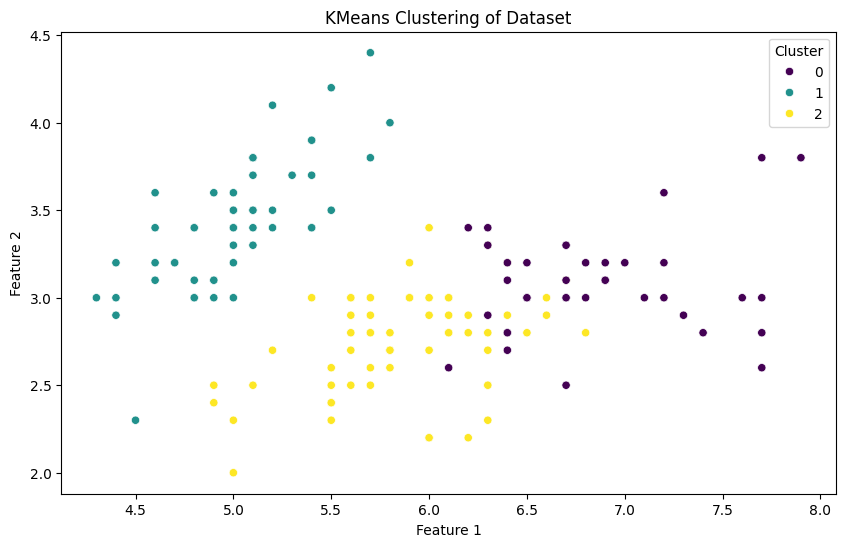

In [29]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering of Dataset')
plt.show()


B) Hierarchical Clustering

Hierarchical clustering builds a hierarchy of clusters using a bottom-up approach (agglomerative). 
It starts by treating each data point as a single cluster and merges the closest pairs of clusters until all points are in one cluster.

Suitability for the Iris Dataset:
Hierarchical clustering is suitable for the Iris dataset as it provides a clear visual representation of the data's hierarchical structure through 
a dendrogram.With these steps, your notebook should be complete and ready for submission. Ensure you test the code to confirm everything works
as expected. Let me know if you encounter any further issues!

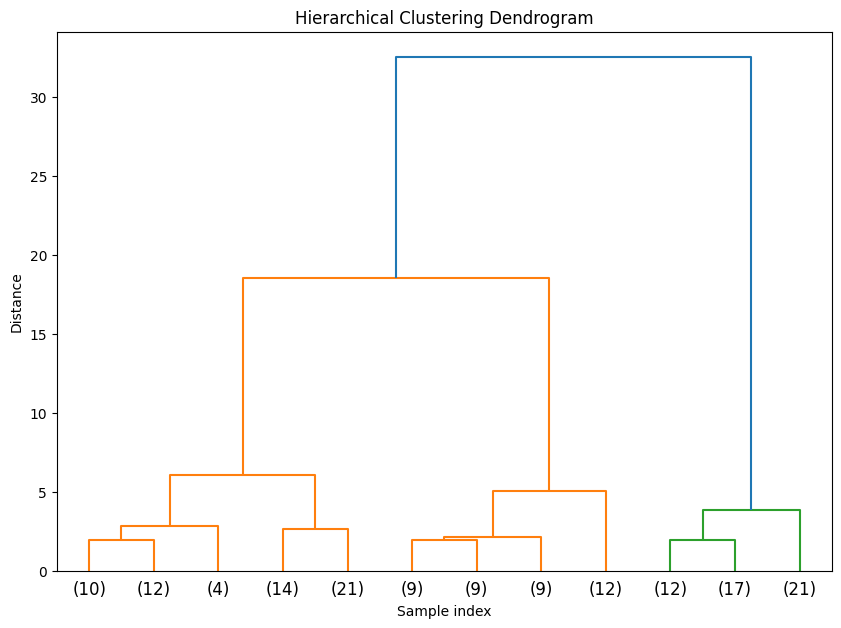

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

linked = linkage(df.iloc[:, :-1], method='ward')

# Plot dendrogram
plt.figure(figsize=(10,7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True,truncate_mode='lastp', p=12)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Assign clusters
df['Cluster_Hierarchical'] = fcluster(linked, 3, criterion='maxclust')



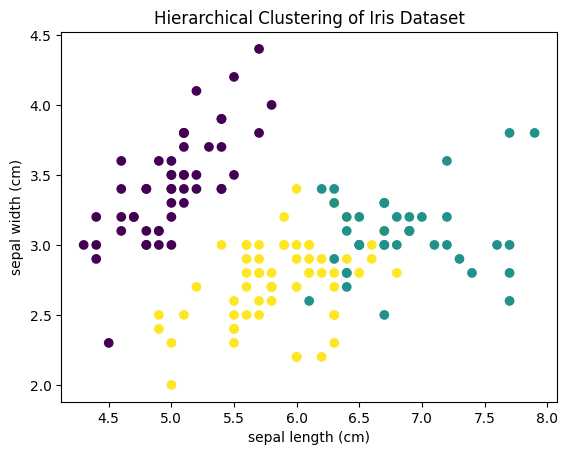

In [36]:
# Visualize the clusters
plt.scatter(df.iloc[:, 0],df.iloc[:, 1], c=df['Cluster_Hierarchical'], cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Hierarchical Clustering of Iris Dataset')
plt.show()
